In [18]:
#copied from PHAS0029 Session 6
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt


In [19]:
#adaped from PHAS0029 Session 6
a = 0.0          # Start of interval
b = 20.0E-6         # end of interval. Chose to use units of seconds, rather than microseconds
#in case useful later
N = 1000# number of steps. 1000 gives a nice smooth line
h = (b-a)/N      # size of each step, i.e. delta t
print("Step size h is", h)
x = 0.0          # initial condition

tpoints = np.arange(a,b,h) # array of time points

#print(tpoints)

Step size h is 2e-08


In [20]:
#adaped from PHAS0029 Session 6
def V_in(tpoints):
    '''Square wave V_in function
    Inputs: array of t-values
    Returns: array with -1 if np.floor(2t*1000000) is even, +1 if np.floor(2t*1000000) is odd'''
    n = np.floor(2*tpoints*1000000)#calc n as floor of 2t (in microseconds). Hence multiply by 1000000
    return (-1) ** n#calc -1, 1's from n. 1 for even, -1 for odd

V_in = V_in(tpoints)


<IPython.core.display.Javascript object>


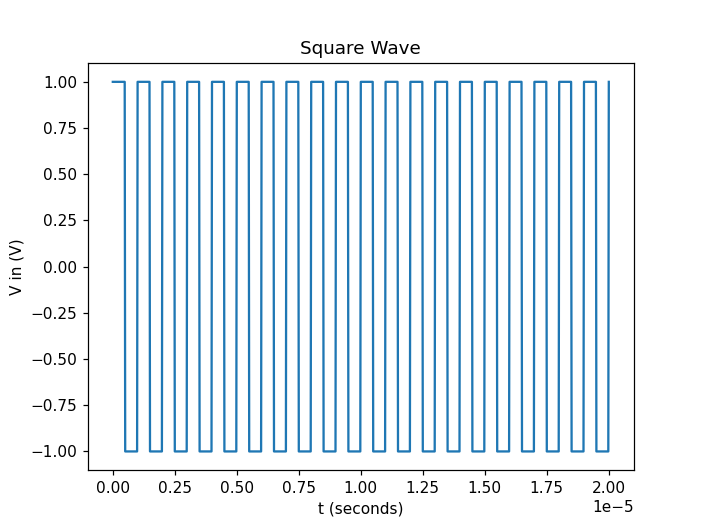

In [21]:
#adaped from PHAS0029 Session 6
plt.figure()
plt.plot(tpoints,V_in)
plt.title("Square Wave")
plt.xlabel("t (seconds)")
plt.ylabel("V in (V)");

Function we need to define:

$$ \frac{dV_{\rm out}}{dt} = \frac{1}{RC} ( V_{\rm in} - V_{\rm out}). $$

In [5]:
#adaped from PHAS0029 Session 6
RC = 0.000001#first value of time constant given.
def f(x,t):
    ''' Definition of our numerical function
    Inputs:
    x: a value or array of x values equivalent to V_out in this example
    t: time at which to evaluate the function
    Uses a global variable for time constant RC
    Outputs:
    f(x,t): function evaluated for this x and t'''
    
    return (1/RC) * ((-1)**np.floor(2*t*1000000)- x)#replicating above equation. Vin uses same equation


In [6]:
#copied from PHAS0029 Session 6
def RungeKutta4(x,tpoints):
    '''Fourth-order Runge Kutta. Inputs: initial x, array of t-values
    Also depends on step h (global variable) and
    requires the function f(x,t) to be defined.
    Returns: array of propagated xpoints'''
    xpoints = [] # a new array for the fourth-order results
    # same procedure as before. When you re-use this function, comment it appropriately!
    for t in tpoints:
        #print(x)
        xpoints.append(x) 
        k1 = h*f(x,t)     
        k2 = h*f(x+0.5*k1, t+0.5*h)
        k3 = h*f(x+0.5*k2, t+0.5*h)
        k4 = h*f(x+k3, t+h)
        x = x + (k1 + 2*k2 + 2*k3 + k4)/6
    return xpoints
xpoints = RungeKutta4(0,tpoints)


<IPython.core.display.Javascript object>


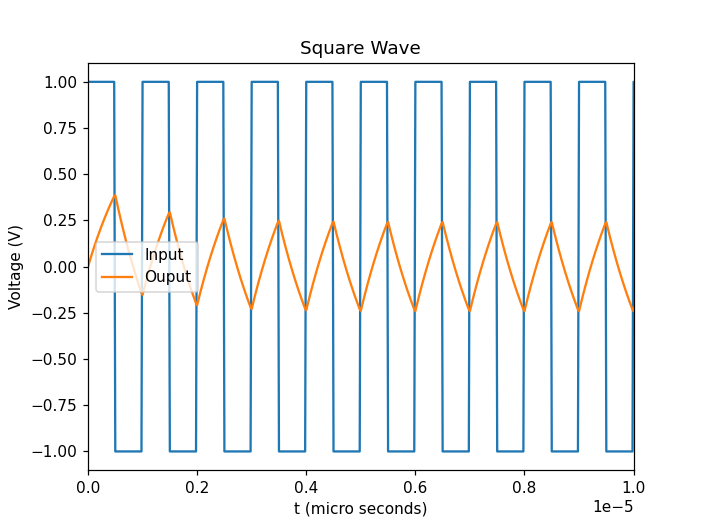

In [7]:
#adaped from PHAS0029 Session 6
xpoints = RungeKutta4(0,tpoints)
plt.figure()
plt.plot(tpoints,V_in, label = "Input")
plt.plot(tpoints, xpoints, label = "Ouput")
plt.legend()
plt.title("Square Wave")
plt.xlabel("t (micro seconds)")
plt.ylabel("Voltage (V)");
plt.xlim(0,0.00001);

<IPython.core.display.Javascript object>


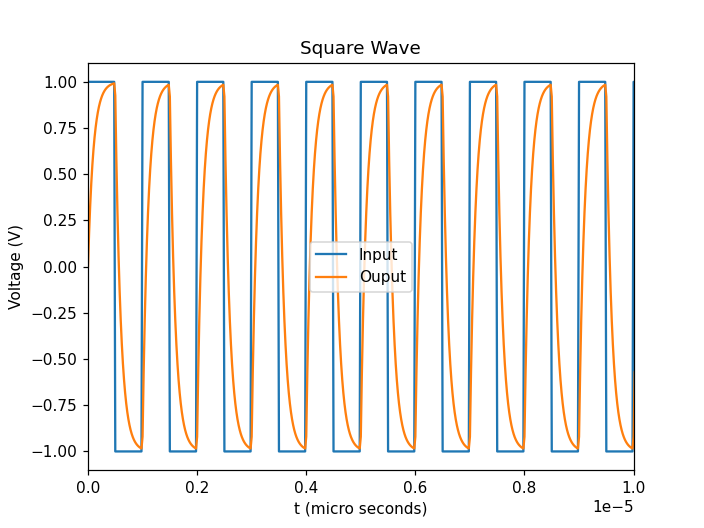

In [8]:
RC = 0.0000001#reduced by factor of 10

#code below copied from above
xpoints = RungeKutta4(0,tpoints)
plt.figure()
plt.plot(tpoints,V_in, label = "Input")
plt.plot(tpoints, xpoints, label = "Ouput")
plt.legend()
plt.title("Square Wave")
plt.xlabel("t (micro seconds)")
plt.ylabel("Voltage (V)")
plt.xlim(0,0.00001);


<IPython.core.display.Javascript object>


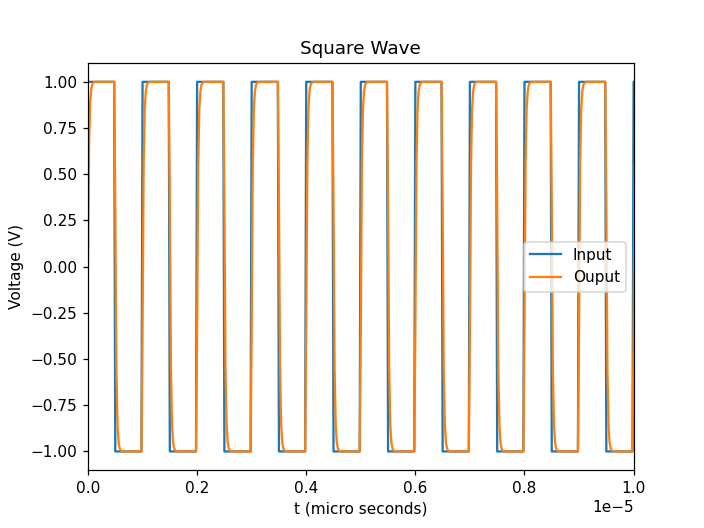

In [9]:
RC = 0.00000001#reduced by a further factor of 10
#code below copied from above
xpoints = RungeKutta4(0,tpoints)
plt.figure()
plt.plot(tpoints,V_in, label = "Input")
plt.plot(tpoints, xpoints, label = "Ouput")
plt.legend()
plt.title("Square Wave")
plt.xlabel("t (micro seconds)")
plt.ylabel("Voltage (V)")
plt.xlim(0,0.00001);

Low pass filters only let low frequencies through. 
The three graphs have square waves with the same frequency, but the time constant RC is decreased from 1 to 0.1 to 0.01 microseconds. Cutoff frequency is where output voltage is 0.707 of the input voltage and is calculated:


$$ f = \frac{1}{2 \pi RC} $$


1 cycle of wave takes 4 microseconds, so frequency is 250kHz. This is above cutoff frequency in first graph (159kHz), so it gets attenuated. You can see clearly the action of the capacitor charging and discharding. The next two graphs have higher cutoff frequencies and so the output voltages are not attenuated. In the second graph, you can see the action of the capacitor charging and discharging, while in the third, the RC value is so low that the output voltage is very close to the square wave input.


In [10]:
RC_list= [1e-6, 0.1e-6, 0.01e-6]#list of three RC values used
for RC in RC_list:#loop through the three values in the list
    f_cut = 1/ (2*np.pi*RC)#apply cut off frequency calculation
    print("RC:", RC, "s", "\tCutoff frequency: ", f_cut, "Hz")

print("\nsignal frequency:", 1/4e-6, "Hz" )#calc as 1/Period

RC: 1e-06 s 	Cutoff frequency:  159154.94309189534 Hz
RC: 1e-07 s 	Cutoff frequency:  1591549.4309189534 Hz
RC: 1e-08 s 	Cutoff frequency:  15915494.309189534 Hz

signal frequency: 250000.0 Hz


In [11]:
#adaped from PHAS0029 Session 6
def V_in(tpoints):
    '''Sine wave V_in function
    Inputs: array of t-values
    Returns: array with values of sin(2*t*1000000)'''
    
    return np.sin(tpoints*2*1000000)

V_in = V_in(tpoints)


<IPython.core.display.Javascript object>


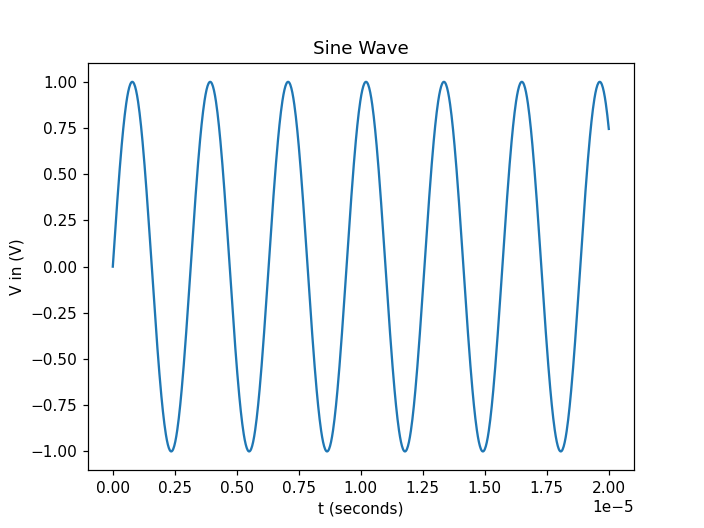

In [12]:
#adaped from PHAS0029 Session 6
plt.figure()
plt.plot(tpoints,V_in)
plt.title("Sine Wave")
plt.xlabel("t (seconds)")
plt.ylabel("V in (V)");

In [13]:
#adaped from PHAS0029 Session 6
def f(x,t):
    ''' Definition of our numerical function
    Inputs:
    x: a value or array of x values
    t: time at which to evaluate the function
    Uses a global variable for time constant RC
    Outputs:
    f(V_out,t): function evaluated for this V_out and t'''
    
    return (1/RC) * (np.sin(2*t*1000000)- x)#function using sine wave as V in

<IPython.core.display.Javascript object>


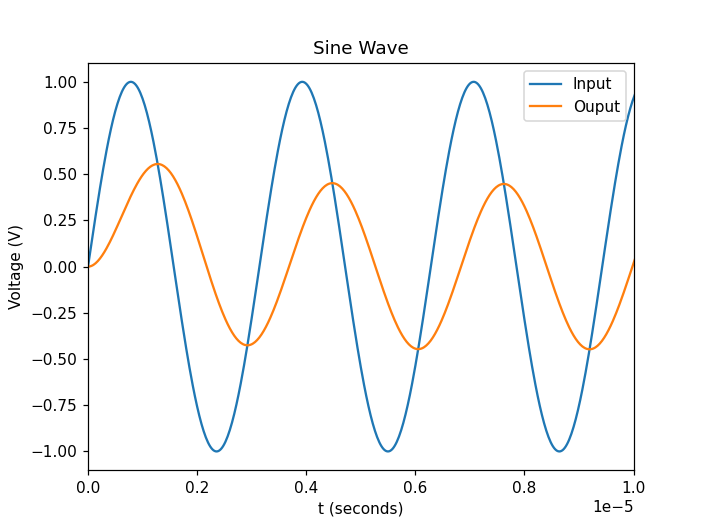

In [14]:
#adaped from PHAS0029 Session 6
RC = 0.000001#highest value used, should attenuate signal
xpoints = RungeKutta4(0,tpoints)
plt.figure()
plt.plot(tpoints,V_in, label = "Input")
plt.plot(tpoints, xpoints, label = "Ouput")
plt.legend()
plt.title("Sine Wave")
plt.xlabel("t (seconds)")
plt.ylabel("Voltage (V)")
plt.xlim(0,0.00001);

<IPython.core.display.Javascript object>


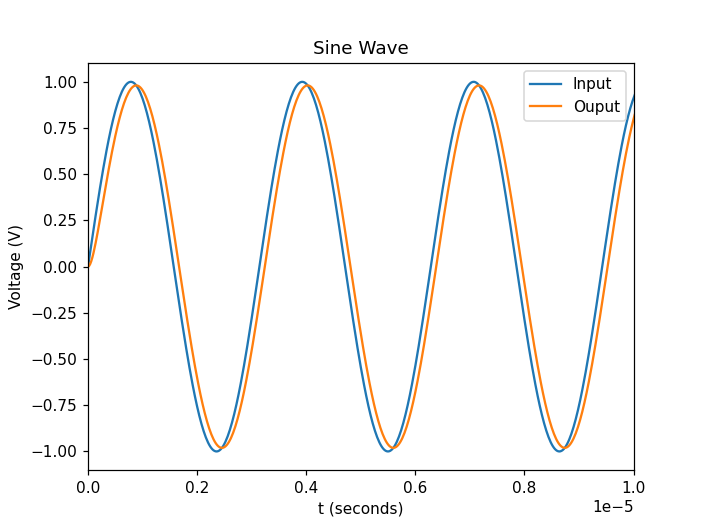

In [15]:
RC = 0.0000001#divided by 10

xpoints = RungeKutta4(0,tpoints)
plt.figure()
plt.plot(tpoints,V_in, label = "Input")
plt.plot(tpoints, xpoints, label = "Ouput")
plt.legend()
plt.title("Sine Wave")
plt.xlabel("t (seconds)")
plt.ylabel("Voltage (V)")
plt.xlim(0,0.00001);

<IPython.core.display.Javascript object>


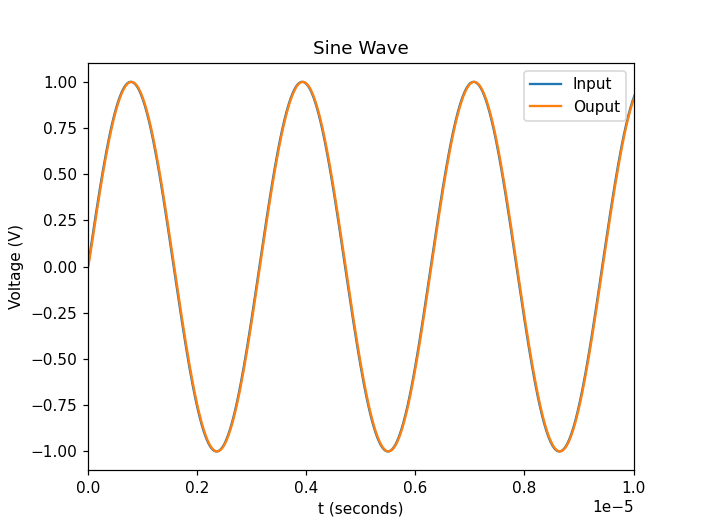

In [16]:
RC = 0.00000001
xpoints = RungeKutta4(0,tpoints)
plt.figure()
plt.plot(tpoints,V_in, label = "Input")
plt.plot(tpoints, xpoints, label = "Ouput")
plt.legend()
plt.title("Sine Wave")
plt.xlabel("t (seconds)")
plt.ylabel("Voltage (V)")
plt.xlim(0,0.00001);

Using sine wave, we see the same effect of attenuation of low frequencies. Also a phase shift occurs for these. At higher frequencies (or in this case the lowest RC values), input signal is let through with no change. In between the signal is not attenuated but there is a small phase difference. 